# Innlesing av filer

Maskinen kan lese data ut av filer, men det må være råtekst. Microsoft Word sin .docx er altfor sammensatt og komplisert.

Vi kan lese data med pylab-funksjonen "loadtxt()".

- Den trenger filnavnet som streng og "delimiter" er det som skiller dataene.
- "skiprows" gir hvor mange rader med kode som skal utelas.
- "dtype" beskriver datatypene. Er streng som standard
- "usecols = " angir hvilke kolonner som skal brukes. Disse kan angis som en tuple.

Slik som her:
data = loadtxt("test.txt", skiprows=1, delimiter=",")

Eksempler:

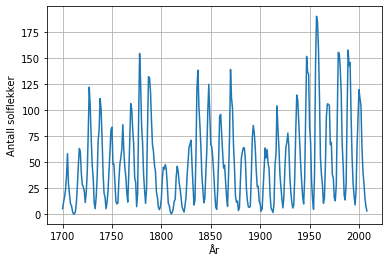

In [23]:
solf_data = loadtxt("solflekker.txt", delimiter = ",", skiprows = 1)

maned = solf_data[:,0]   
solf = solf_data[:,1]

# Lager lister med varabler som blir hentet fra filen.
# [:,0] betyr at den skal kjøre gjennom alle radene og ta nullte verdi inn i denne listen.

plot(maned, solf)
xlabel("År")
ylabel("Antall solflekker")
grid()

# Gjennomsnitt og standardavvik

### Gjennomsnitt

For å finne gjennomsnittet i matematikk bruker vi formelen: $$ \bar x = \frac{1}{n}  \sum_{i=1}^n x_i $$

I Python bruker vi funksjonen "mean()"
- Den trenger en liste eller array til å finne gjennomsnitt av.

### Spredninger i målinger

Varians og standardavvik er målinger på spredninger i målinger

For å finne standardavvik i matematikk bruker vi formelen: $$ \sigma = \sqrt{\frac{1}{n}  \sum_{i=1}^n (x_i - \bar x)}  $$

I Python bruker vi funksjonen "std()"            ( ͡° ͜ʖ ͡°)
- Den trenger den trenger en liste eller array, til å finne gjennomsnitt av, og finne differansen mellom det og den verdien som er lengst unna det.

Eksempel (i kombinasjon med innlesing av filer):

In [24]:
from pylab import *

data = loadtxt("test.txt", skiprows=1, delimiter=",")

nr = data[:,0]
hoyde = data[:,1]

#plot(nr, hoyde)

snitt = mean(hoyde)
avvik = std(hoyde)
print("Snitt: ", snitt, "\n", "Standardavvik: ", avvik)

Snitt:  1.575 
 Standardavvik:  0.22514809940718278


# Regresjon

Regresjonsanalyse er å finne en funksjon som passer best mulig med punktene i et datasett.

Funksjonen "polyfit(x, y, grad)" lager en funksjon med gitt polynomgrad (grad), x-verdier (x) og y-verdier (y). Så returnerer den konstantene i den. Dette kan være svært hjelpsomt i regresjonsanalyse av data.

### R2 Score
I eksempelet nedenfor bruker jeg også funksjonen r2_score() som jeg må importere fra sklearn.metrics biblioteket. 
- Den trenger en liste eller array med datapunkter
- Den trenger en liste eller array med datapunkter, nedenfor tatt ut ifra tilsvarende verdier i polynomfunksjonen min

Den gir meg en verdi fra 0 til 1, på hvor presis polynomfunksjonen er med datapunktene. 0 betyr helt upresis (som er praktisk talt umulig) og 1 betyr at funksjonen går akkurat gjennom punktene. Det er viktig å huske at det ikke nødvendigvis betyr at funksjonen gir et godt bilde av utviklingen til datapunktene.


Eksempel:

R2-verdien er 0.7580746978167603


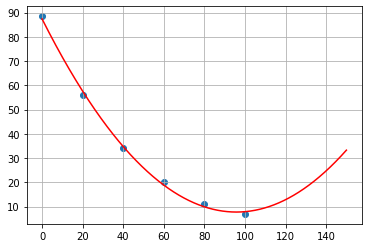

In [27]:
from pylab import *
from sklearn.metrics import r2_score

T = [0, 20, 40, 60, 80, 100]
sol_NH3 = [88.5, 56.0, 34.0, 20.0, 11.0, 7.0]

scatter(T, sol_NH3)

grad = 2
reg_NH3 = polyfit(T, sol_NH3, grad) 
#print (reg_NH3) 

x = linspace(0, 150, 10000)
y = (reg_NH3[0]) * x**2 + (reg_NH3[1]) * x + (reg_NH3[2])

y_r2 = []

for x_r2 in range(1,7):
    y_r2_verdi = (reg_NH3[0]) * x_r2**2 + (reg_NH3[1]) * x_r2 + (reg_NH3[2])
    y_r2.append(y_r2_verdi)

r2 = r2_score(sol_NH3, y_r2)
print("R2-verdien er", R2)

plot(x, y, color = "red")
#xlabel("")
#ylabel("")
grid()
# Ville pyntet på grafen men har glemt hva den viser
show()

# Grafiske framstillinger av data

### Kakediagram

Et kakediagram viser forekomsten til en viss ting stilt opp mot andre som en del av en rund helhet.

For å lage et kakediagram i bruker vi "pie()"
- Den trenger kun én variabel; en liste eller array med datapunkter, for å vise forekomsten av like datapunkter.
- Ved å bruke "label =" kan gi en annen liste som input for å gi navn til delene av kakediagrammet

Eksempel:

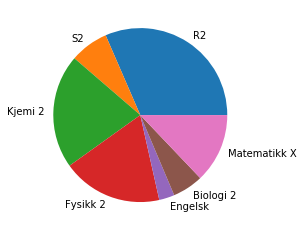

In [14]:
from pylab import *

fag = ["R2", "S2", "Kjemi 2", "Fysikk 2", "Engelsk", "Biologi 2", "Matematikk X"]
antall = [110, 25, 74, 65, 10, 20, 45]

pie(antall, labels = fag)
show()

### Stolpediagram/Histograf

Et stolpediagram er en form for diagram hvor du viser antall av forskjellige typer data, stilt opp mot hverandre.

For å lage en histograf bruker vi "hist()"
- Den trenger kun én variabel; en liste eller array med datapunkter, for å vise forekomsten av like datapunkter.

Eksempel:

Text(0.5, 1.0, 'Sepal length in Iris flowers')

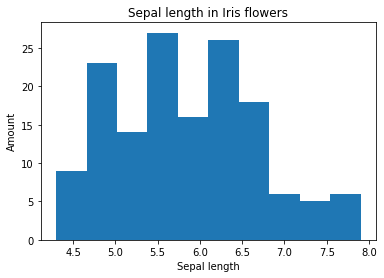

In [3]:
from pylab import *

data = loadtxt("Iris.csv", delimiter = ",", skiprows = 1, usecols = (0, 1, 2, 3, 4))

sepal_length = data[:,1]
sepal_width = data[:,2]
petal_length = data[:,3]

hist(sepal_length)
xlabel("Sepal length")
ylabel("Amount")
title("Sepal length in Iris flowers")

### Usikkerhetsstolpeplott

Vi kan grafisk framstille usikkerhet med usikkerhetsstolpeplott med funksjonen "errorbar()"
- Den trenger en x-verdi som er en liste eller array
- Den trenger en y verdi som er en liste eller array
- Den trenger en usikkerhet som man kan bruke "std()" til å finne

Eksempel:

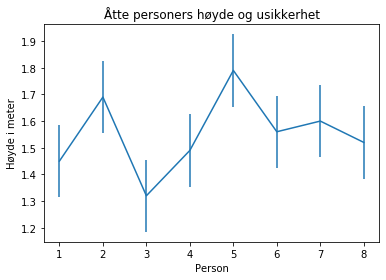

In [11]:
from pylab import *

nr = linspace(1, 8, 8) # Nummererer mine prøvekaniner fra 1 til 8
hoyde = [1.45, 1.69, 1.32, 1.49, 1.79, 1.56, 1.60, 1.52] # Høyden deres

errorbar(nr, hoyde, std(hoyde))
xlabel("Person")
ylabel("Høyde i meter")
title("Åtte personers høyde, med standardavvik")
show()